In [66]:
import warnings   
warnings.simplefilter("ignore") 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
%matplotlib notebook

import sys
sys.path.append('/Users/Serene/calour')
import calour as cl
import numpy as np
import pandas as pd
import calour.cahelper as cah
import calour.analysis

from scipy.stats import sem
import pickle

In [62]:
cl.set_log_level(40) # get rid of warnings in calour

In [ ]:
with open("filtering_datasets.pkl", "wb") as f:
    pickle.dump((filtlev, sig_bh_gcd, sig_ds_gcd, sig_bh_dibd, sig_ds_dibd,
                sig_bh_sps, sig_ds_sps, sig_bh_cfs, sig_ds_cfs,
                sig_bh_shs, sig_ds_shs, sig_bh_mlt, sig_ds_mlt,
                sig_bh_cs, sig_ds_cs, sig_bh_dme, sig_ds_dme,
                sig_bh_ukt, sig_ds_ukt, sig_bh_ag1, sig_ds_ag1,
                sig_bh_ag2, sig_ds_ag2, sig_bh_ag3, sig_ds_ag3), f)

## Gevers' CD data set (Qiita ID: 1939)

In [2]:
gcd = cl.read_taxa('data/gcd.biom','data/gcd.map.txt', sparse=False, filter_orig_reads=1000)

In [9]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_gcd = []
sig_bh_gcd = []
for i in filtlev:
    gcd_sub = gcd.filter_min_abundance(i)
    ds_gcd = gcd_sub.diff_abundance('diagnosis', 'CD', 'no', fdr_method='dsfdr')
    bh_gcd = gcd_sub.diff_abundance('diagnosis', 'CD', 'no', fdr_method='bhfdr')
    sig_ds_gcd.append(len(ds_gcd.feature_metadata.index))
    sig_bh_gcd.append(len(bh_gcd.feature_metadata.index))

<IPython.core.display.Javascript object>


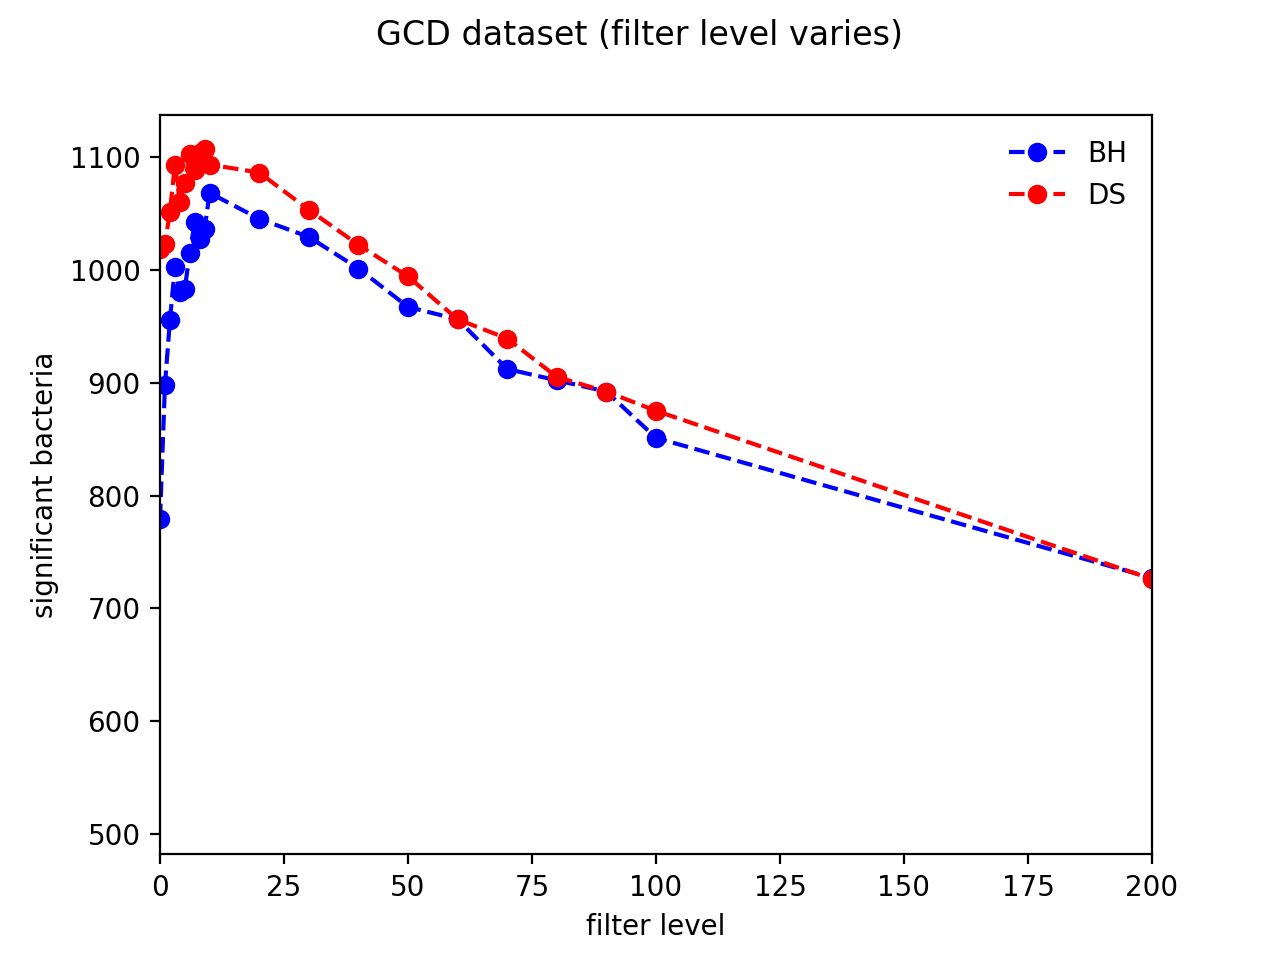

(0, 200)

In [12]:
plt.figure()
plt.plot(filtlev, sig_bh_gcd, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_gcd, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('GCD dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
pylab.xlim([0, 200])

## Dog IBD (Qiita ID: 833)

In [13]:
dibd = cl.read_taxa('data/dibd.biom','data/dibd.map.txt', sparse=False, filter_orig_reads=1000)

In [14]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_dibd = []
sig_bh_dibd = []
for i in filtlev:
    dibd_sub = dibd.filter_min_abundance(i)
    ds_dibd = dibd_sub.diff_abundance('disease_stat','IBD','healthy', fdr_method='dsfdr')
    bh_dibd = dibd_sub.diff_abundance('disease_stat','IBD','healthy', fdr_method='bhfdr')
    sig_ds_dibd.append(len(ds_dibd.feature_metadata.index))
    sig_bh_dibd.append(len(bh_dibd.feature_metadata.index))

<IPython.core.display.Javascript object>


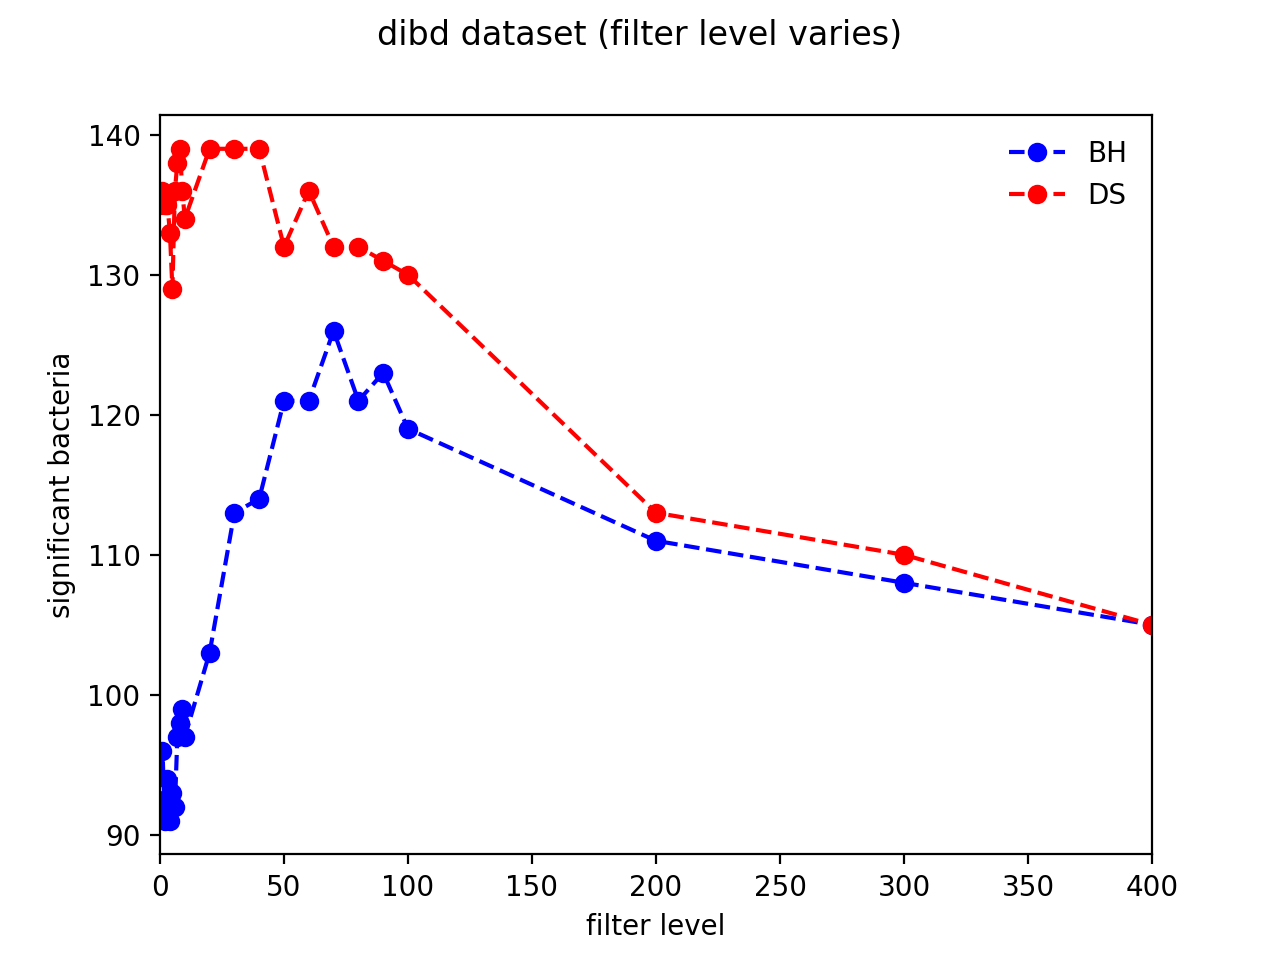

(0, 400)

In [17]:
plt.figure()
plt.plot(filtlev, sig_bh_dibd, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_dibd, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('dibd dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
pylab.xlim([0, 400])   

## soil plant selenium (Qiita ID: 10363)

In [18]:
sps = cl.read_taxa('data/sps.biom','data/sps.map.txt', sparse=False, filter_orig_reads=1000)

In [19]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_sps = []
sig_bh_sps = []
for i in filtlev:
    sps_sub = sps.filter_min_abundance(i)
    ds_sps = sps_sub.diff_abundance('seleniferous','TRUE','FALSE', fdr_method='dsfdr')
    bh_sps = sps_sub.diff_abundance('seleniferous','TRUE','FALSE', fdr_method='bhfdr')
    sig_ds_sps.append(len(ds_sps.feature_metadata.index))
    sig_bh_sps.append(len(bh_sps.feature_metadata.index))

<IPython.core.display.Javascript object>


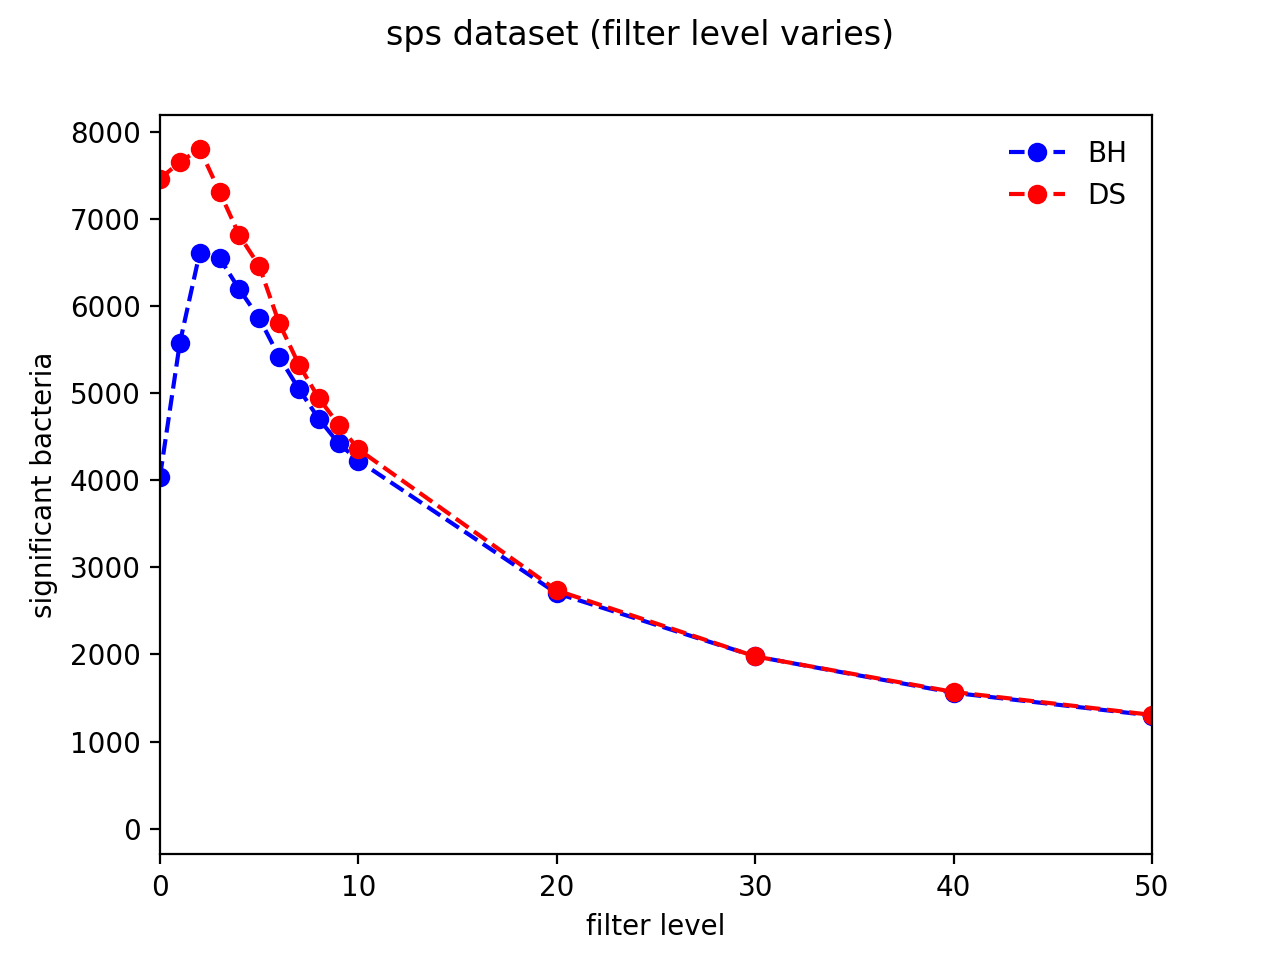

(0, 50)

In [25]:
plt.figure()
plt.plot(filtlev, sig_bh_sps, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_sps, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('sps dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
pylab.xlim([0, 50]) 

## CFS data 

In [26]:
cfs = cl.read_taxa('data/cfs.biom','data/cfs.map.txt', sparse=False, filter_orig_reads=1000)

In [27]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_cfs = []
sig_bh_cfs = []
for i in filtlev:
    cfs_sub = cfs.filter_min_abundance(i)
    ds_cfs = cfs_sub.diff_abundance('Subject','Control','Patient', fdr_method='dsfdr')
    bh_cfs = cfs_sub.diff_abundance('Subject','Control','Patient', fdr_method='bhfdr')
    
    if ds_cfs is None:
        sig_ds = 0
    else:
        sig_ds = len(ds_cfs.feature_metadata.index)
    if bh_cfs is None:
        sig_bh = 0
    else:
        sig_bh = len(bh_cfs.feature_metadata.index)
    
    sig_ds_cfs.append(sig_ds)
    sig_bh_cfs.append(sig_bh)

2017-03-13 20:36:01 WARNING no significant features found
2017-03-13 20:36:05 WARNING no significant features found
2017-03-13 20:36:07 WARNING no significant features found
2017-03-13 20:36:09 WARNING no significant features found
2017-03-13 20:36:10 WARNING no significant features found
2017-03-13 20:36:12 WARNING no significant features found
2017-03-13 20:36:13 WARNING no significant features found


<IPython.core.display.Javascript object>


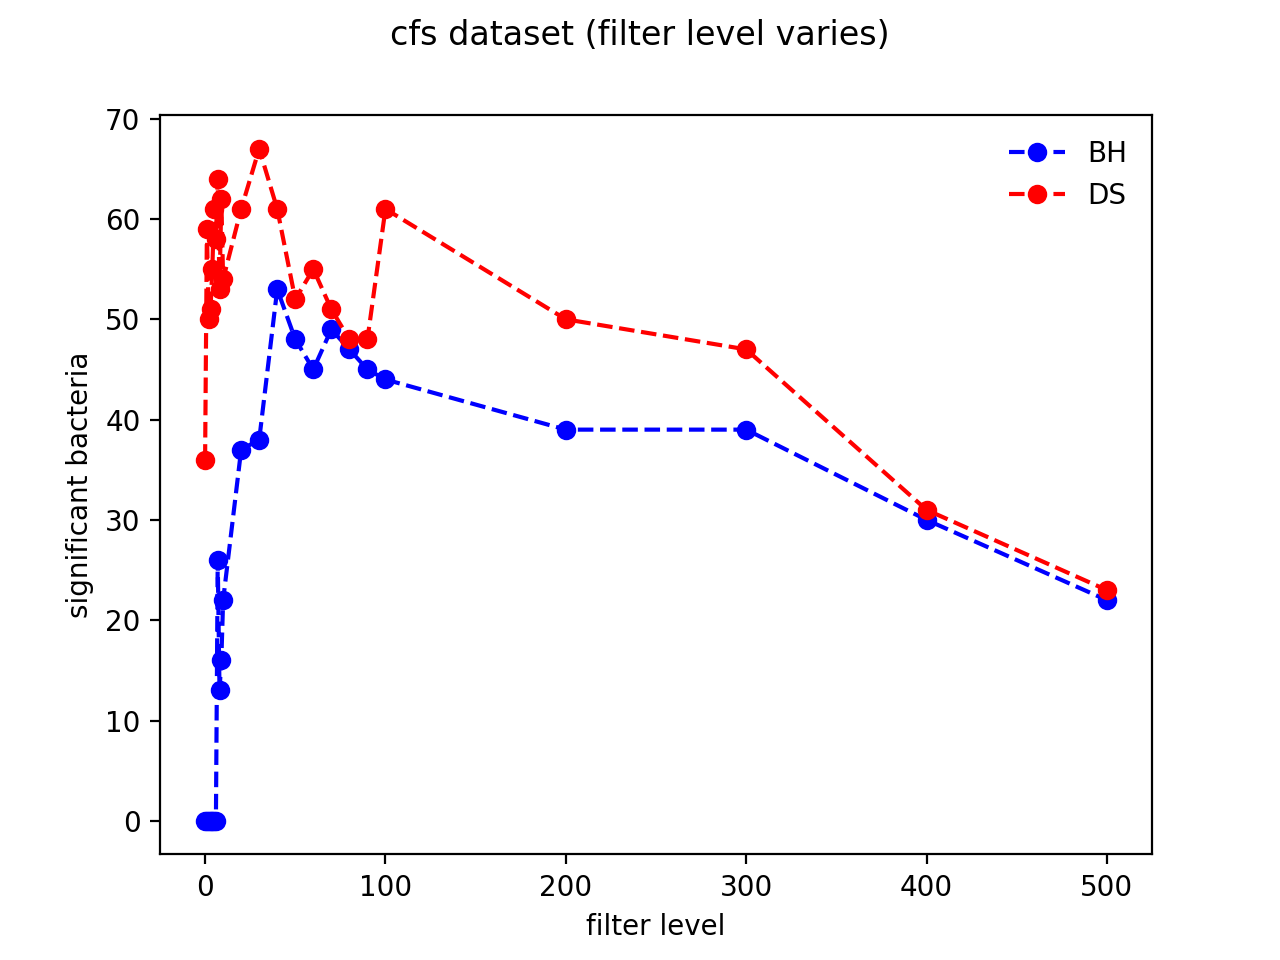

In [28]:
plt.figure()
plt.plot(filtlev, sig_bh_cfs, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_cfs, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('cfs dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
#pylab.xlim([0, 200])    

## Soil Human Samples (Qiita ID: 353)

In [29]:
shs = cl.read_taxa('data/shs.biom','data/shs.map.txt', sparse=False, filter_orig_reads=1000)

In [30]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_shs = []
sig_bh_shs = []
for i in filtlev:
    shs_sub = shs.filter_min_abundance(i)
    ds_shs = shs_sub.diff_abundance('env_feature','ENVO:human-associated habitat','ENVO:soil', 
                                    fdr_method='dsfdr')
    bh_shs = shs_sub.diff_abundance('env_feature','ENVO:human-associated habitat','ENVO:soil', 
                                    fdr_method='bhfdr')
    sig_ds_shs.append(len(ds_shs.feature_metadata.index))
    sig_bh_shs.append(len(bh_shs.feature_metadata.index))

<IPython.core.display.Javascript object>


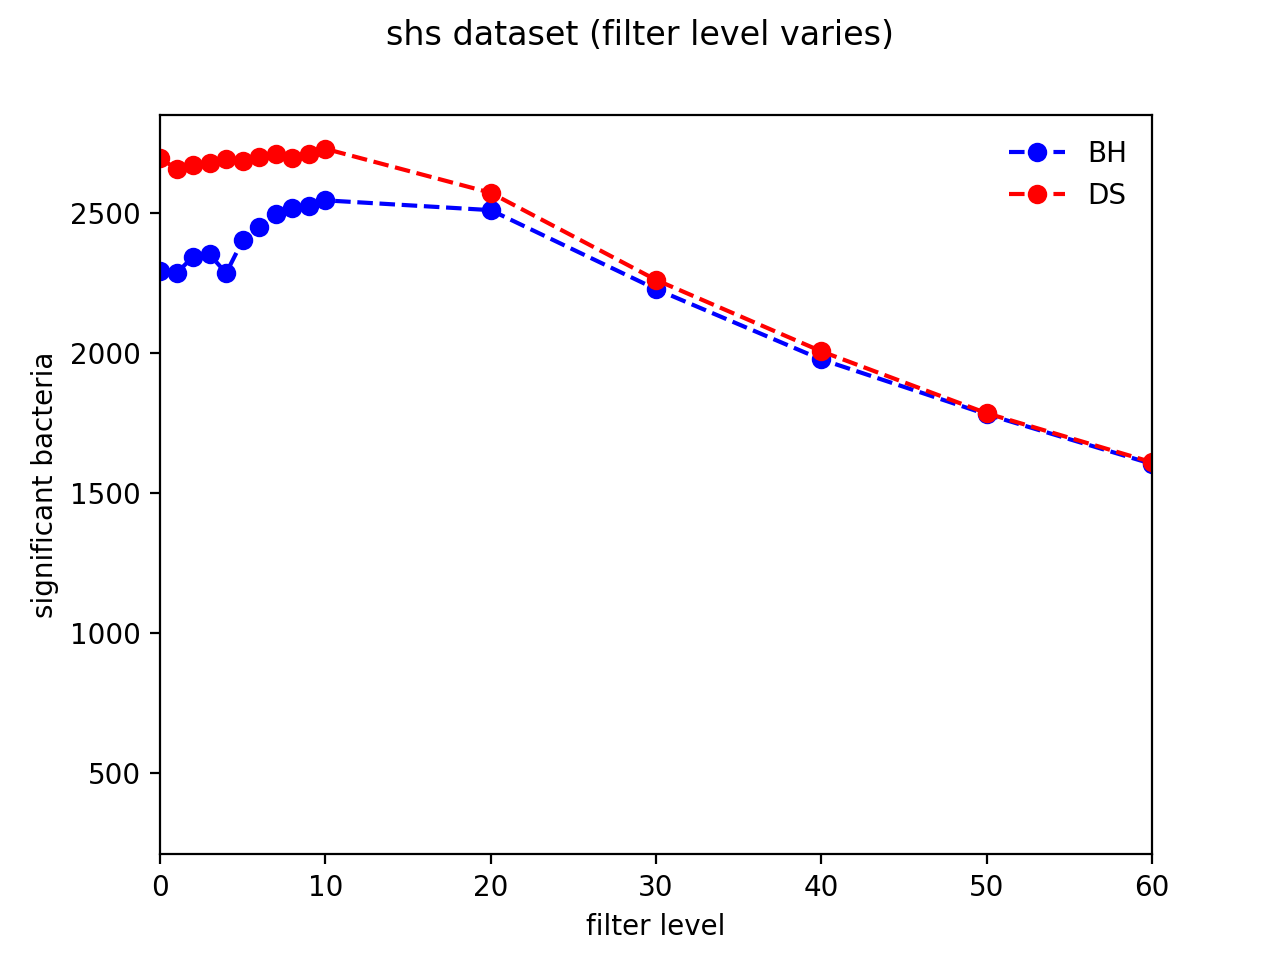

(0, 60)

In [33]:
plt.figure()
plt.plot(filtlev, sig_bh_shs, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_shs, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('shs dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
pylab.xlim([0, 60])    

## Mice Lacking Toil-like Receptor (Qitta ID: 460)

In [34]:
mlt = cl.read_taxa('data/mlt.biom','data/mlt.map.txt', sparse=False, filter_orig_reads=1000)

In [36]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_mlt = []
sig_bh_mlt = []
for i in filtlev:
    mlt_sub = mlt.filter_min_abundance(i)
    ds_mlt = mlt_sub.diff_abundance('Description','mouse cecum, TLR5 knockout',
                                    'mouse cecum, wild type', fdr_method='dsfdr')
    bh_mlt = mlt_sub.diff_abundance('Description','mouse cecum, TLR5 knockout',
                                    'mouse cecum, wild type', fdr_method='bhfdr')
    if ds_mlt is None:
        sig_ds = 0
    else:
        sig_ds = len(ds_mlt.feature_metadata.index)
    if bh_mlt is None:
        sig_bh = 0
    else:
        sig_bh = len(bh_mlt.feature_metadata.index)
        
    sig_ds_mlt.append(sig_ds)
    sig_bh_mlt.append(sig_bh)   

2017-03-13 20:40:09 WARNING no significant features found
2017-03-13 20:40:10 WARNING no significant features found
2017-03-13 20:40:10 WARNING no significant features found
2017-03-13 20:40:11 WARNING no significant features found
2017-03-13 20:40:11 WARNING no significant features found
2017-03-13 20:40:11 WARNING no significant features found
2017-03-13 20:40:12 WARNING no significant features found
2017-03-13 20:40:12 WARNING no significant features found
2017-03-13 20:40:12 WARNING no significant features found
2017-03-13 20:40:13 WARNING no significant features found
2017-03-13 20:40:13 WARNING no significant features found
2017-03-13 20:40:14 WARNING no significant features found
2017-03-13 20:40:14 WARNING no significant features found
2017-03-13 20:40:14 WARNING no significant features found
2017-03-13 20:40:14 WARNING no significant features found
2017-03-13 20:40:15 WARNING no significant features found
2017-03-13 20:40:15 WARNING no significant features found
2017-03-13 20:

<IPython.core.display.Javascript object>


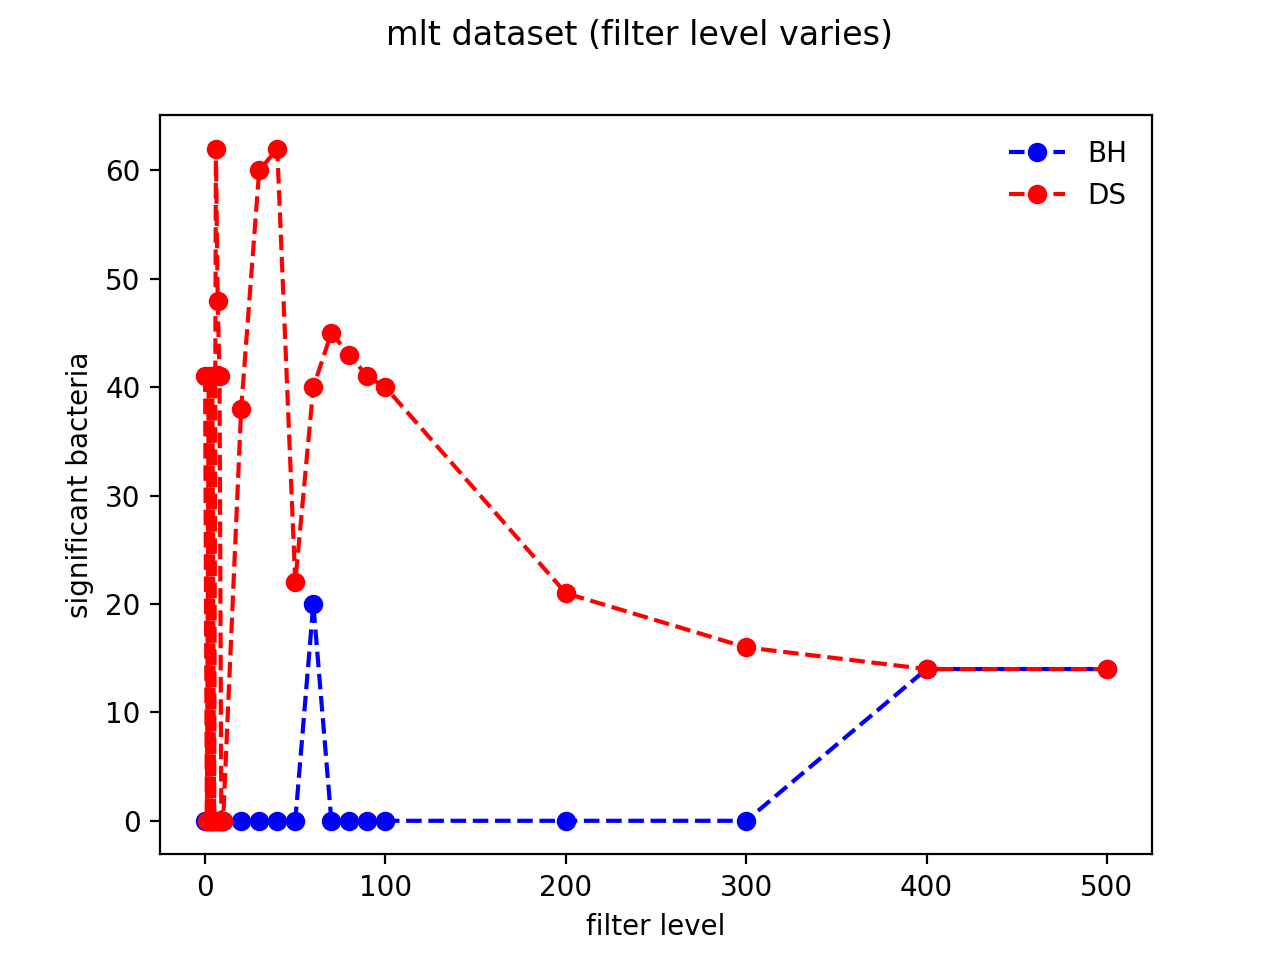

In [39]:
plt.figure()
plt.plot(filtlev, sig_bh_mlt, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_mlt, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('mlt dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')

## Cigarette Smokers (Qiita: 524)

In [ ]:
## anything wrong here (last time: sig_CS = c(181, 121, 0))

In [40]:
cs = cl.read_taxa('data/cs.biom','data/cs.map.txt', sparse=False, filter_orig_reads=1000)

In [41]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_cs = []
sig_bh_cs = []
for i in filtlev:
    cs_sub = cs.filter_min_abundance(i)
    ds_cs = cs_sub.diff_abundance('smoker','False','True', fdr_method='dsfdr')
    bh_cs = cs_sub.diff_abundance('smoker','False','True', fdr_method='bhfdr')
    sig_ds_cs.append(len(ds_cs.feature_metadata.index))
    sig_bh_cs.append(len(bh_cs.feature_metadata.index))

<IPython.core.display.Javascript object>


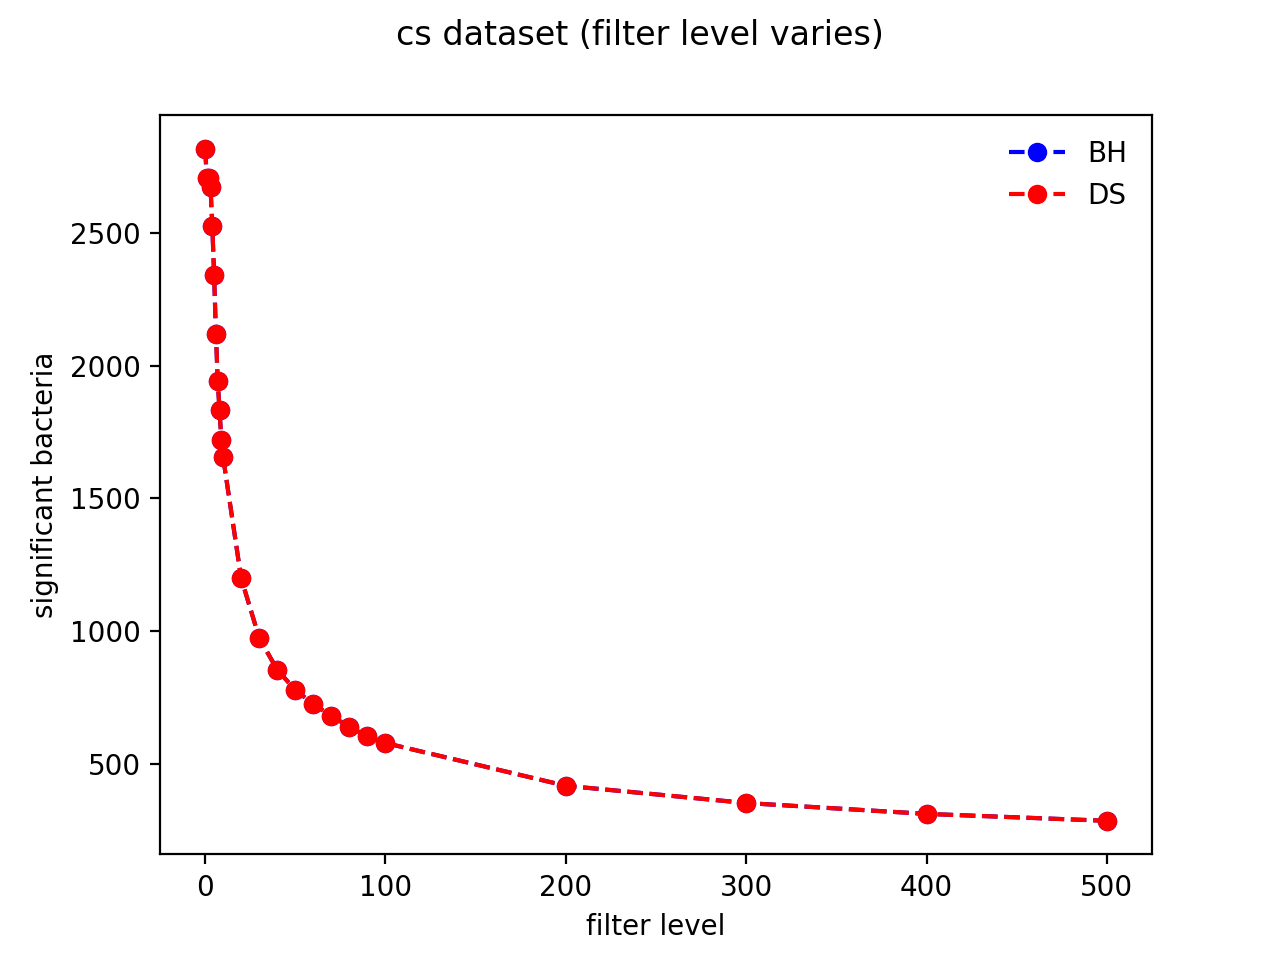

In [44]:
plt.figure()
plt.plot(filtlev, sig_bh_cs, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_cs, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('cs dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
#pylab.xlim([0, 200])    

## Delivery Mode Effect (Qiita: 395)

In [45]:
dme = cl.read_taxa('data/dme.biom','data/dme.map.txt', sparse=False, filter_orig_reads=1000)

In [46]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_dme = []
sig_bh_dme = []
for i in filtlev:
    dme_sub = dme.filter_min_abundance(i)
    ds_dme = dme_sub.diff_abundance('misc_param','cesarean delivery','vaginal delivery', 
                                    fdr_method='dsfdr')
    bh_dme = dme_sub.diff_abundance('misc_param','cesarean delivery','vaginal delivery', 
                                    fdr_method='bhfdr')
    sig_ds_dme.append(len(ds_dme.feature_metadata.index))
    sig_bh_dme.append(len(bh_dme.feature_metadata.index))

<IPython.core.display.Javascript object>


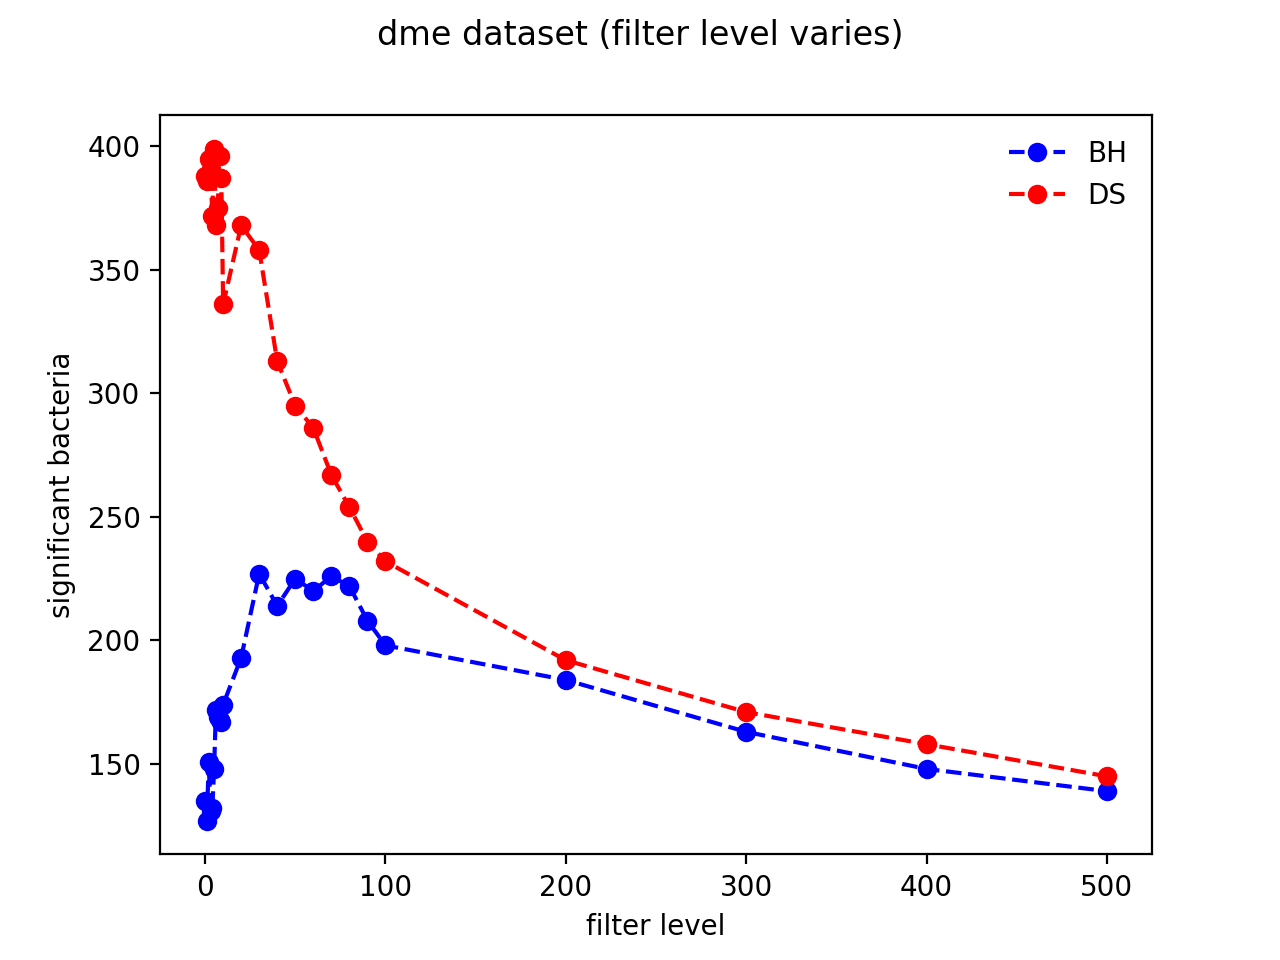

In [47]:
plt.figure()
plt.plot(filtlev, sig_bh_dme, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_dme, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('dme dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
#pylab.xlim([0, 200])    

## UK Twins

In [48]:
ukt = cl.read_taxa('data/uk_twins_otu.biom','data/uk_twins_map.txt',sparse=False, filter_orig_reads=1000)

In [49]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_ukt = []
sig_bh_ukt = []
for i in filtlev:
    ukt_sub = ukt.filter_min_abundance(i)
    ds_ukt = ukt_sub.diff_abundance('bmi_cat','Lean','Obese', fdr_method='dsfdr')
    bh_ukt = ukt_sub.diff_abundance('bmi_cat','Lean','Obese', fdr_method='bhfdr')
    sig_ds_ukt.append(len(ds_ukt.feature_metadata.index))
    sig_bh_ukt.append(len(bh_ukt.feature_metadata.index))   

<IPython.core.display.Javascript object>


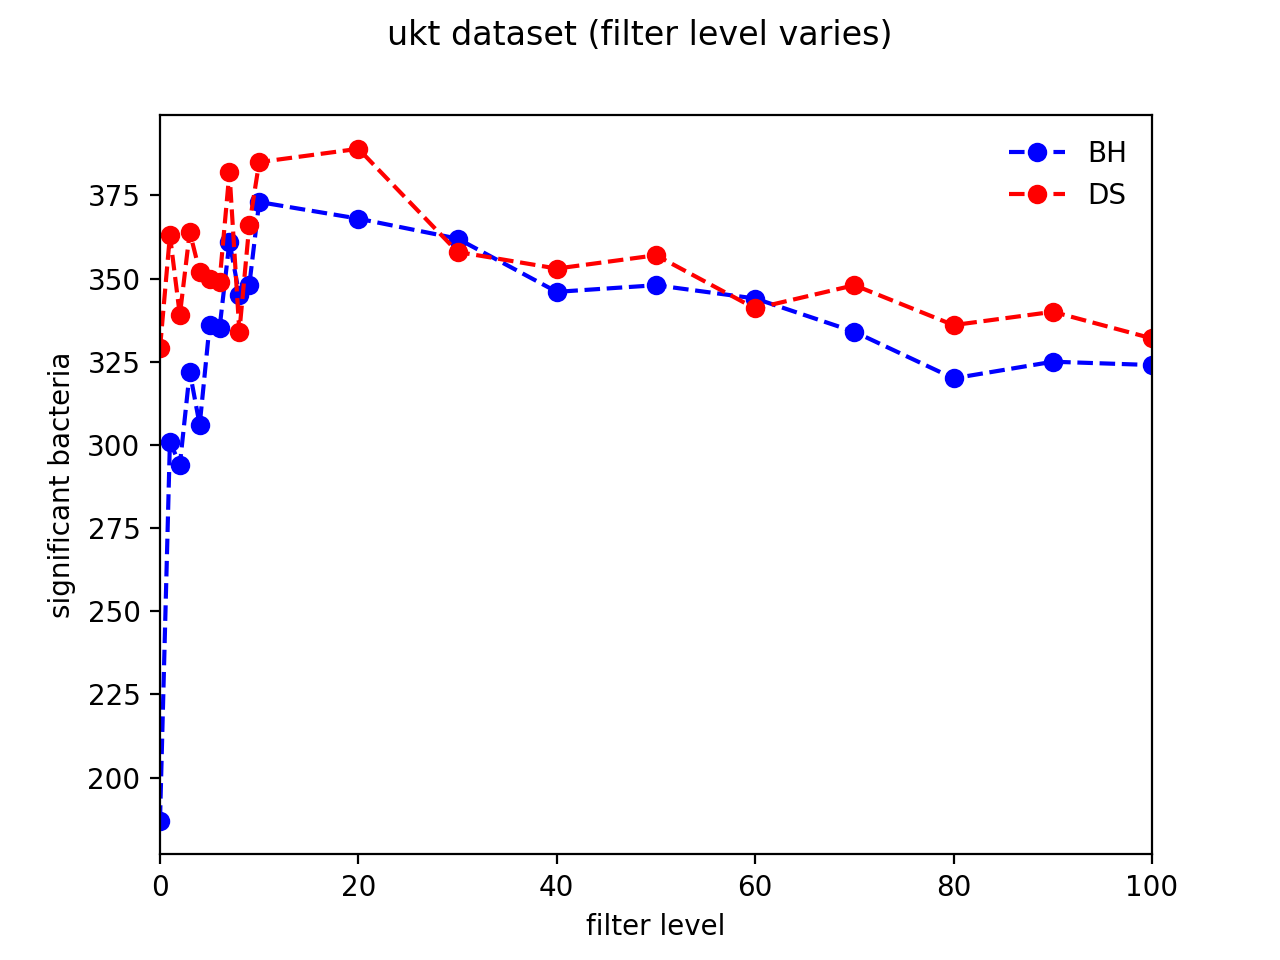

(0, 100)

In [51]:
plt.figure()
plt.plot(filtlev, sig_bh_ukt, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_ukt, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('ukt dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
pylab.xlim([0, 100]) 

## American Gut

In [52]:
ag = cl.read_taxa('data/ag.biom','data/ag_fecals.map.txt',sparse=False, filter_orig_reads=1000)

In [53]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_ag1 = []
sig_bh_ag1 = []
sig_ds_ag2 = []
sig_bh_ag2 = []
for i in filtlev:
    ag_sub = ag.filter_min_abundance(i)
    
    ds_ag1 = ag_sub.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                'Week', fdr_method='dsfdr')
    bh_ag1 = ag_sub.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                'Week', fdr_method='bhfdr')
    if ds_ag1 is None:
        sig_ds1 = 0
    else:
        sig_ds1 = len(ds_ag1.feature_metadata.index)
    if bh_ag1 is None:
        sig_bh1 = 0
    else:
        sig_bh1 = len(bh_ag1.feature_metadata.index)
        
    sig_ds_ag1.append(sig_ds1)
    sig_bh_ag1.append(sig_bh1)
    
    ds_ag2 = ag_sub.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5', fdr_method='dsfdr')
    bh_ag2 = ag_sub.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5', fdr_method='bhfdr')
    if ds_ag2 is None:
        sig_ds2 = 0
    else:
        sig_ds2 = len(ds_ag2.feature_metadata.index)
    if bh_ag2 is None:
        sig_bh2 = 0
    else:
        sig_bh2 = len(bh_ag2.feature_metadata.index)
        
    sig_ds_ag2.append(sig_ds2)
    sig_bh_ag2.append(sig_bh2) 

2017-03-13 20:55:10 WARNING no significant features found
2017-03-13 20:56:31 WARNING no significant features found
2017-03-13 20:59:15 WARNING no significant features found
2017-03-13 21:00:43 WARNING no significant features found
2017-03-13 21:03:29 WARNING no significant features found
2017-03-13 21:04:53 WARNING no significant features found
2017-03-13 21:07:33 WARNING no significant features found
2017-03-13 21:09:00 WARNING no significant features found
2017-03-13 21:11:47 WARNING no significant features found
2017-03-13 21:13:13 WARNING no significant features found
2017-03-13 21:16:01 WARNING no significant features found
2017-03-13 21:17:27 WARNING no significant features found
2017-03-13 21:20:06 WARNING no significant features found
2017-03-13 21:21:30 WARNING no significant features found
2017-03-13 21:23:58 WARNING no significant features found
2017-03-13 21:25:12 WARNING no significant features found
2017-03-13 21:27:35 WARNING no significant features found
2017-03-13 21:

<IPython.core.display.Javascript object>


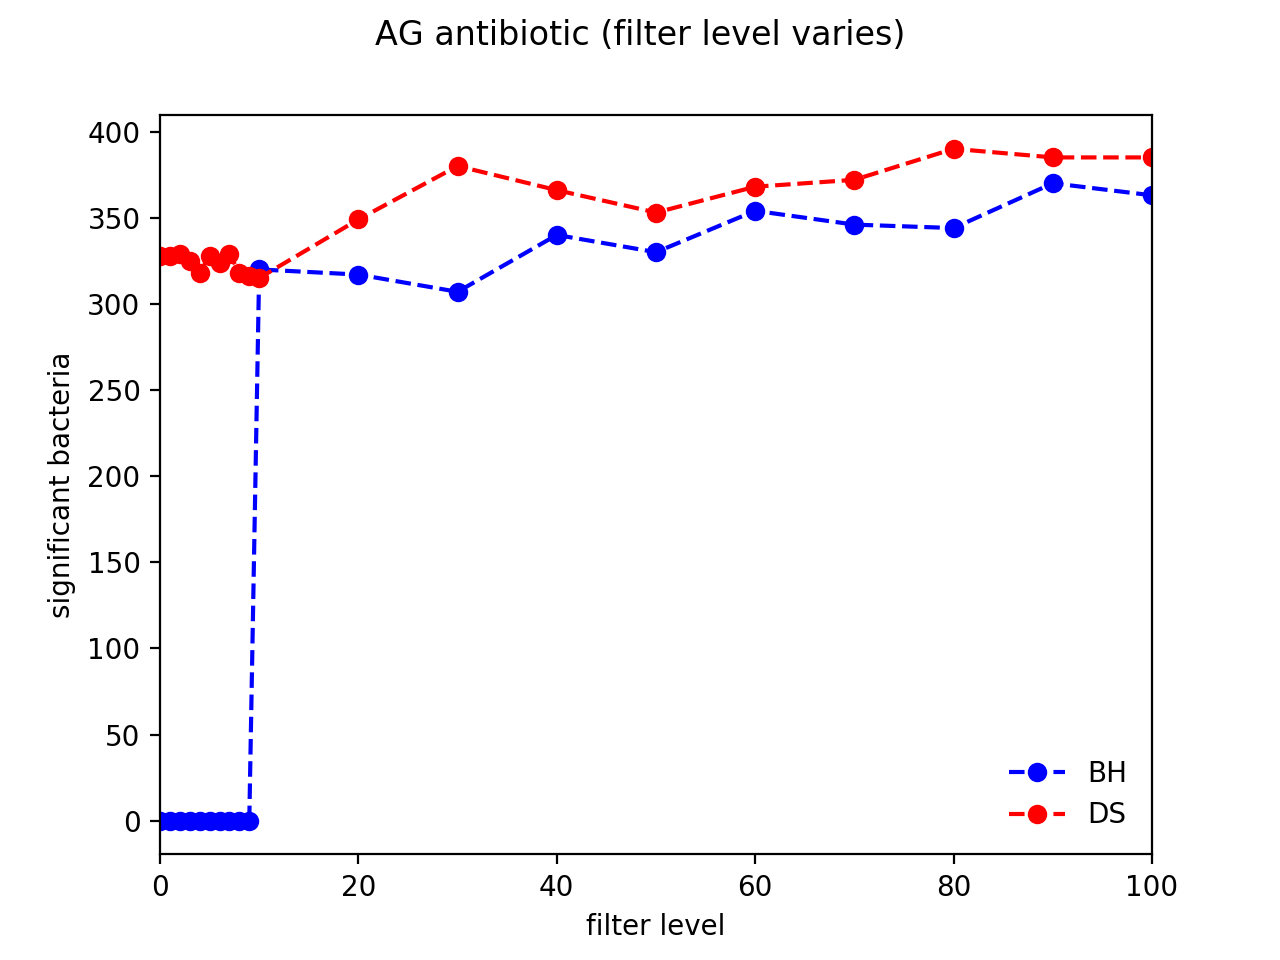

(0, 100)

In [61]:
plt.figure()
plt.plot(filtlev, sig_bh_ag1, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_ag1, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('AG antibiotic (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
pylab.xlim([0, 100])   

<IPython.core.display.Javascript object>


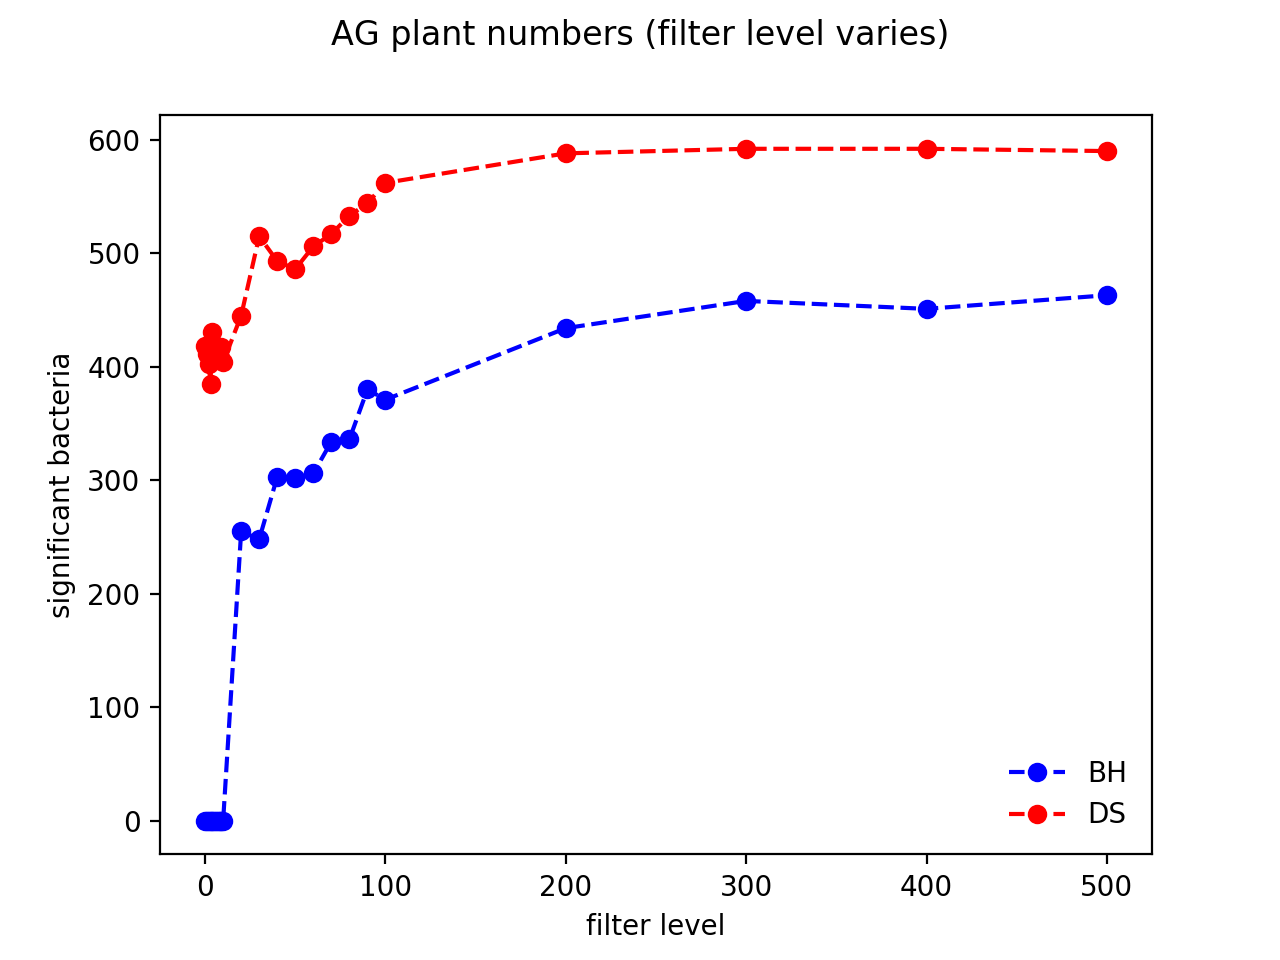

In [56]:
plt.figure()
plt.plot(filtlev, sig_bh_ag2, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_ag2, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('AG plant numbers (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')
#pylab.xlim([0, 200])   

In [63]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
sig_ds_ag3 = []
sig_bh_ag3 = []
for i in filtlev:
    ag_sub = ag.filter_min_abundance(i)
    
    ds_ag3 = ag_sub.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                ['Week', 'Month', 'Year', '6 months'], fdr_method='dsfdr')
    bh_ag3 = ag_sub.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                ['Week', 'Month', 'Year', '6 months'], fdr_method='bhfdr')
    if ds_ag3 is None:
        sig_ds3 = 0
    else:
        sig_ds3 = len(ds_ag3.feature_metadata.index)
    if bh_ag1 is None:
        sig_bh3 = 0
    else:
        sig_bh3 = len(bh_ag3.feature_metadata.index)
        
    sig_ds_ag3.append(sig_ds3)
    sig_bh_ag3.append(sig_bh3)
    
    

<IPython.core.display.Javascript object>


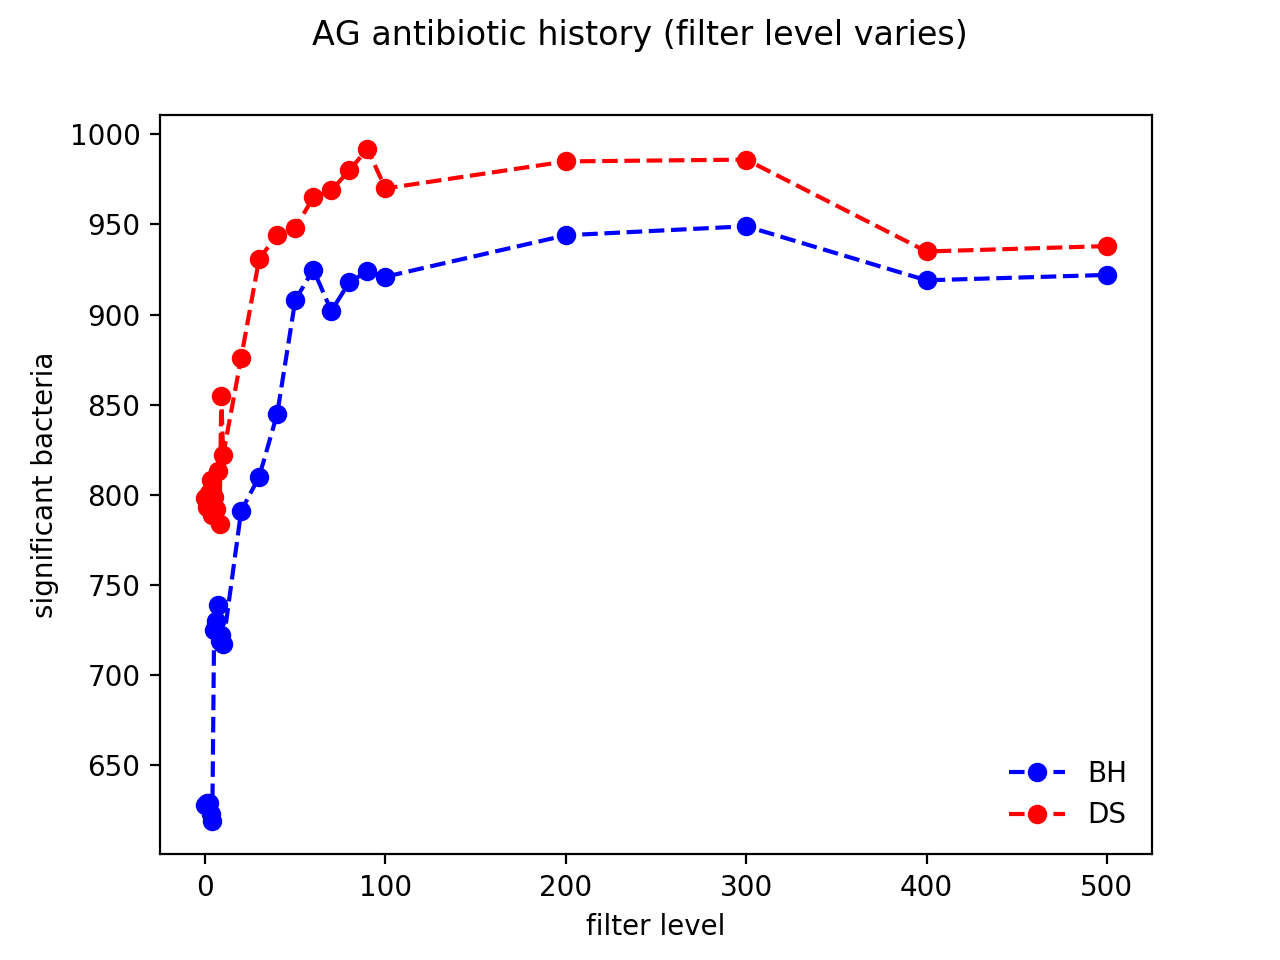

In [68]:
plt.figure()
plt.plot(filtlev, sig_bh_ag3, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(filtlev, sig_ds_ag3, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('AG antibiotic history (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')